# Data compilation

In [2]:
import pandas as pd
from os import listdir, getcwd
from os.path import isfile, join, dirname

In [3]:
path = join(join(getcwd(), 'unprocessed'), 'well production')
files = [join(path, f) for f in listdir(path) if isfile(join(path, f)) and f != 'well production.csv']

In [4]:
data = pd.read_csv(open(files.pop()))
while len(files) > 0:
    f = files.pop()
    if f.endswith('.csv'):
        temp = pd.read_csv(open(f))
        data = pd.concat([data, temp])

# Modelling Data

In [5]:
data=data.drop(['proppant weight (lbs)','pump rate (cubic feet/min)'], axis=1)

In [6]:
X = data[["easting", "northing"]]
y = data.drop(["easting", "northing"], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train_data = [y_train[x] for x in y_train.columns]
test_data = [y_test[x] for x in y_test.columns]

In [9]:
def create_forest():
    return RandomForestRegressor()
def create_bagging():
    return BaggingRegressor()
def create_boosting():
    return GradientBoostingRegressor()
def create_svr():
    return SVR()

In [10]:
models = [create_forest, create_bagging, create_boosting, create_svr]

In [11]:
data_sets = []

In [12]:
def print_scores(model, train_x, train_y, test_x, test_y):
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    return train_score, test_score

In [13]:
good_models = []
for i in range(len(train_data)):
    max_score = -99999999
    print('Training for feature: {}...'.format(y.columns[i]))
    for model in models:
        current_model = model().fit(X_train, train_data[i])
        (train, test) = print_scores(current_model, X_train, train_data[i], X_test, test_data[i])
        if test > max_score:
            best_model = current_model
            max_score = test
    good_models.append(best_model)
    print("done.")

Training for feature: porosity...
done.
Training for feature: permeability...
done.
Training for feature: Poisson's ratio...
done.
Training for feature: Young's Modulus...
done.
Training for feature: water saturation...
done.
Training for feature: oil saturation...
done.


In [14]:
for i in range(len(train_data)):
    current_model = good_models[i]
    train, test = print_scores(current_model, X_train, train_data[i], X_test, test_data[i])
    print("{}, model: {}".format(train_data[i].name, current_model))
    print("train score: {:1.2f}, test score: {:1.2f}".format(train, test), end="\n\n")

porosity, model: GradientBoostingRegressor()
train score: 0.73, test score: 0.73

permeability, model: GradientBoostingRegressor()
train score: 0.69, test score: 0.68

Poisson's ratio, model: RandomForestRegressor()
train score: 1.00, test score: 1.00

Young's Modulus, model: BaggingRegressor()
train score: 1.00, test score: 1.00

water saturation, model: RandomForestRegressor()
train score: 1.00, test score: 1.00

oil saturation, model: RandomForestRegressor()
train score: 1.00, test score: 1.00



# Mapping

In [15]:
import numpy as np

In [16]:
min_easting = min(data.easting)
max_easting = max(data.easting)
min_northing = min(data.northing)
max_northing = max(data.northing)

In [17]:
step_size = 100
scale = (max_easting - min_easting) / (max_northing - min_northing)

In [18]:
x = np.arange(start=min_easting, stop=max_easting, step=step_size)
y = np.round(np.arange(start=min_northing, stop=max_northing, step=step_size / scale))
l = []
for i in range(len(x)):
    for j in range(len(y)):
        l.append([x[i], y[j]])
locations = np.array(l)

In [19]:
results = np.zeros((locations.shape[0], len(good_models) + locations.shape[1]))
columns = ['easting', 'northing']
results[:,:2] = locations

In [20]:
colormaps = ['bone', 'pink', 'hot', 'PuRd', 'Blues', 'Greens']

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline  

Mapping feature: porosity


/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


done.
Mapping feature: permeability


/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


done.
Mapping feature: Poisson's ratio


/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


done.
Mapping feature: Young's Modulus


/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


done.
Mapping feature: water saturation


/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


done.
Mapping feature: oil saturation


/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


done.


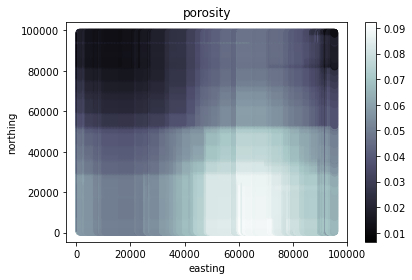

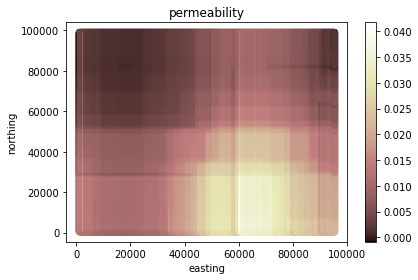

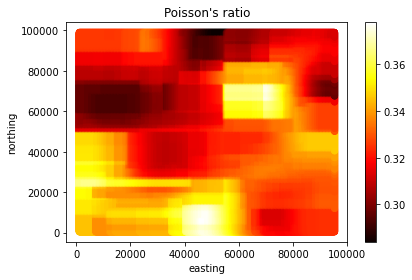

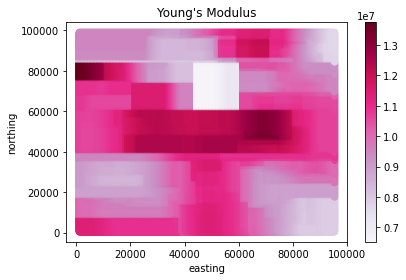

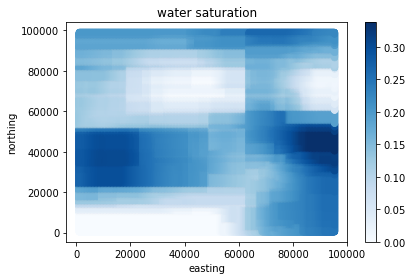

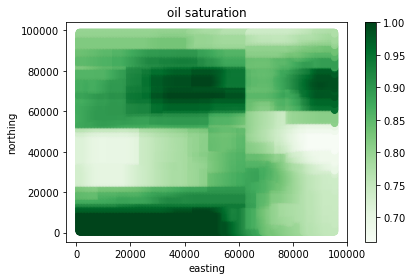

In [22]:
for i in range(len(good_models)):
    model = good_models[i]
    feature_name = train_data[i].name
    print('Mapping feature: {}'.format(feature_name))

    fig, ax = plt.subplots()
    ax.set_ylabel('northing')
    ax.set_xlabel('easting')
    ax.set_title(feature_name)
    prediction = model.predict(locations)
    results[:,2+i] = prediction
    sc = ax.scatter(locations[:,0], locations[:,1], c=prediction, cmap=colormaps[i])
    fig.colorbar(sc)
    fig.tight_layout()
    fig.show()
    print('done.')


In [23]:
mapped_data = pd.DataFrame(data=results, columns=data.columns)

# Oil Calculation

In [24]:
mapped_data['OOIP'] = mapped_data['oil saturation'] * mapped_data['porosity'] * 7758

In [25]:
logged_ooip = np.log10(mapped_data['OOIP'])

/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


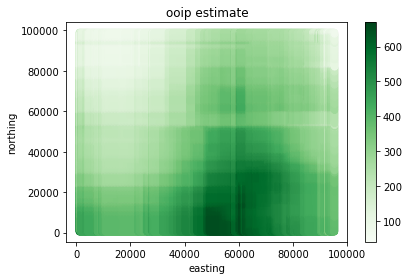

In [95]:
fig, ax = plt.subplots()
ax.set_ylabel('northing')
ax.set_xlabel('easting')
ax.set_title('ooip estimate')
sc = plt.scatter(mapped_data['easting'], mapped_data['northing'], c=logged_ooip, cmap='Greens')
fig.colorbar(sc)
fig.tight_layout()
fig.show()

# Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
samples = mapped_data.drop('OOIP',axis=1).sample(n=40_000)

In [29]:
clustering_model = AgglomerativeClustering(linkage='ward', n_clusters = 12)
sample_labels = clustering_model.fit_predict(samples.drop(['easting','northing'],axis=1))

/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


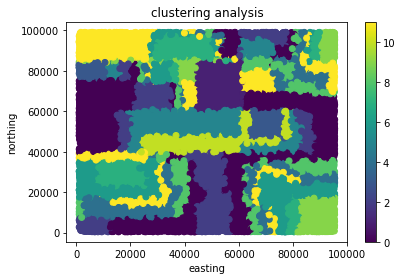

In [31]:
fig, ax = plt.subplots()
ax.set_ylabel('northing')
ax.set_xlabel('easting')
ax.set_title('clustering analysis')
sc = ax.scatter(samples['easting'], samples['northing'], c=sample_labels)
fig.colorbar(sc)
fig.tight_layout()
fig.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
label_classifier = RandomForestClassifier()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(samples, sample_labels, test_size=0.4)

In [45]:
label_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
labels = label_classifier.predict(mapped_data.drop('OOIP',axis=1))

/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


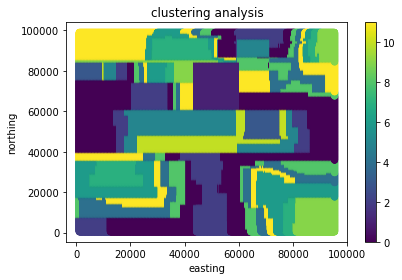

In [49]:
fig, ax = plt.subplots()
ax.set_ylabel('northing')
ax.set_xlabel('easting')
ax.set_title('clustering analysis')
sc = ax.scatter(mapped_data['easting'], mapped_data['northing'], c=labels)
fig.tight_layout()
fig.show()

# Determining Ideal Well Locations

In [58]:
best_label = label_classifier.predict(mapped_data.loc[(mapped_data['easting'] == min_easting) & 
                                        (mapped_data['northing'] == min_northing)].drop('OOIP', axis=1))


In [65]:
search_indices = [i for i in range(len(labels)) if labels[i] == best_label]

In [109]:
num_wells = 10
well_length = 5280 * 2
well_width = 100 * 2

In [110]:
from tqdm.notebook import tqdm

In [119]:
best_eastings = []
best_northings = []
best_values = []
ooip_vals = np.negative(np.ones((len(search_indices))))
for well_num in range(num_wells):
    found_val = -1
    found_easting = -1
    found_northing = -1
    print("Finding well #{}".format(well_num+1))
    for i in tqdm(range(len(search_indices))):
        index = search_indices[i]
        row = mapped_data.iloc[index]
        location = (row['easting'], row['northing'])
        bad_index = False
        for n_i in range(len(best_northings)):
            northing = best_northings[n_i]
            # Using 3 * well width for spacing between wells
            if northing - 3*well_width <= row['northing'] <= northing + 3*well_width:
                if best_eastings[n_i] <= row['easting'] <= best_eastings[n_i] + well_length:
                    bad_index = True
                    break
        if not bad_index:
            easting = row['easting']
            northing = row['northing']
            if ooip_vals[i] == -1:
                val = mapped_data.loc[(mapped_data['easting'] >= easting) & 
                                   (mapped_data['easting'] <= easting+well_length) &
                                  (mapped_data['northing'] == northing)]['OOIP'].values.sum()
                ooip_vals[i] = val
            else:
                val = ooip_vals[i]
            if val > found_val:
                found_val = val
                found_easting = easting
                found_northing = northing
    best_eastings.append(found_easting)
    best_northings.append(found_northing)
    best_values.append(found_val)

Finding well #1



Finding well #2



Finding well #3



Finding well #4



Finding well #5



Finding well #6



Finding well #7



Finding well #8



Finding well #9



Finding well #10


In [120]:
for e,n,v in zip(best_eastings, best_northings, best_values):
    print("{}E, {}N, oil: {}".format(e,n,v))

48400.0E, 819.0N, oil: 68116.13871144244
48400.0E, 1447.0N, oil: 68116.13871144244
48400.0E, 2075.0N, oil: 68116.13871144244
48400.0E, 2703.0N, oil: 68116.13871144244
48400.0E, 3331.0N, oil: 68116.13871144244
48400.0E, 3959.0N, oil: 68107.58947728664
48400.0E, 4587.0N, oil: 68107.58947728664
48400.0E, 5215.0N, oil: 68107.58947728664
48300.0E, 819.0N, oil: 68102.02252126473
48300.0E, 1447.0N, oil: 68102.02252126473


In [132]:
calculated_wells = zip(best_eastings, best_northings)

# Mapping chosen wells

In [99]:
chosen_wells = [
    (4700, 400),
    (4700,800),
    (57000, 10000),
    (58000, 8000),
    (59000, 12000),
    (60000, 10000),
    (61000, 8000),
    (62000, 12000),
    (63000, 10000),
    (64000, 8000),
]

/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


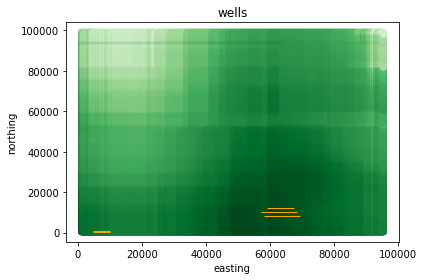

In [103]:
fig, ax = plt.subplots()
ax.set_ylabel('northing')
ax.set_xlabel('easting')
ax.set_title('wells')
ax.scatter(mapped_data['easting'], mapped_data['northing'], c=logged_ooip, cmap='Greens')
for well in chosen_wells:
    ax.hlines(y=well[1], xmin=well[0], xmax=well[0]+well_length, linewidth=1, color='orange')
fig.tight_layout()
fig.show()

/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


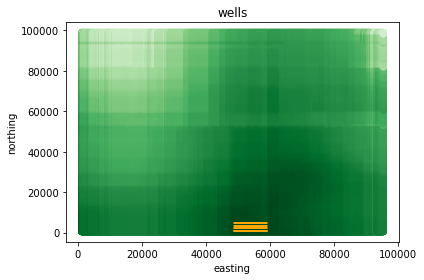

In [121]:
fig, ax = plt.subplots()
ax.set_ylabel('northing')
ax.set_xlabel('easting')
ax.set_title('wells')
ax.scatter(mapped_data['easting'], mapped_data['northing'], c=logged_ooip, cmap='Greens')
for e, n in calculated_wells:
    ax.hlines(y=n, xmin=e, xmax=e+well_length, linewidth=1, color='orange')
fig.tight_layout()
fig.show()

# Calculating oil in place

In [122]:
step = mapped_data['northing'][1]-mapped_data['northing'][0]

In [128]:
def calculate_averages(wells):
    porosity_averages = []
    oil_sat_averages = []
    for well in wells:
        n = well[1]
        e = well[0]
        rows = mapped_data.loc[((mapped_data['northing']-step <= n) &
                                (n <= mapped_data['northing']+step ) & 
                                (mapped_data['easting'] >= e) & 
                                (mapped_data['easting'] <= e+well_length))]
        porosity_averages.append(rows['porosity'].mean())
        oil_sat_averages.append(rows['oil saturation'].mean())
    return porosity_averages, oil_sat_averages

In [133]:
p_a, o_a = calculate_averages(calculated_wells)

In [141]:
def calculate_recoverable_oil(porosity, oil_saturation, length, half_width):
    constant = 7758
    feet_to_acres = 2.29568e-5
    thickness = 24
    formation_volume_factor = 1.6
    area = length * 2*half_width * feet_to_acres
    recovery_factor = .15
    return constant * thickness * area * recovery_factor /formation_volume_factor

In [142]:
oil_extractable = []
for porosity, saturation in zip(p_a, o_a):
    oil_extractable.append(calculate_recoverable_oil(porosity, saturation, well_length, well_width))

In [144]:
oil_sum = 0
for o in oil_extractable:
    oil_sum+=o

In [147]:
print('{:,}'.format(oil_sum))

16,926,515.122176
